Conjoint analysis is a marketing research technique designed to help managers determine the preferences of customers and potential customers.In particular, it seeks to determine how consumers value the different attributes that make up a product and the tradeoffs they are willing to make among the different attributes or features that compose the product. As such, conjoint analysis is best suited for products that have very tangible attributes that can be easily described or quantified.



Conjoint Analysis has become one of the most commonly used quantitative market research methods. It has been successfully employed across a wide variety of industries to quantify consumer preferences for products and services.


Conjoint analysis is the optimal market research approach for measuring the value that consumers place on features of a product or service. This commonly used approach combines real-life scenarios and statistical techniques with the modeling of actual market decisions.

For example, in a survey, the respondent is shown a list of features with associated prices. The respondent then chooses what they want in their ideal product while keeping price as a factor in their decision. For the person conducting the market research, key information can be gained by analyzing what was selected and what was left out. If feature A for $100 was included in the menu question but feature B for $100 was not, it can be assumed that this respondent prefers feature A over feature B.

The outcome of menu-based conjoint analysis is that we can identify the trade-offs consumers are willing to make. We can discover trends indicating must-have features versus luxury features.

Add in the fact that menu-based conjoint analysis is a more engaging and interactive process for the survey taker, and one can see why menu-based conjoint analysis is becoming an increasingly popular way to evaluate the utility of features.

### What is full profile Conjoint Analysis?

Full-profile Conjoint Analysis  is one of the most fundamental approaches for measuring attribute utilities. In a full-profile conjoint task, different product descriptions are developed, ranked and presented to the consumer for preference evaluations. Each product profile is designed as part of a full factorial or fractional factorial experimental design that evenly matches the occurrence of each attribute with all other attributes. By controlling the attribute pairings in a fractional factorial design, the researcher can estimate the respondent’s utility for each level of each attribute tested using a reduced set of profiles.


From Wiki:

'Conjoint analysis' is a survey-based statistical technique used in market research that helps determine how people value different attributes (feature, function, benefits) that make up an individual product or service. The objective of conjoint analysis is to determine what combination of a limited number of attributes is most influential on respondent choice or decision making. A controlled set of potential products or services is shown to survey respondents and by analyzing how they make preferences between these products, the implicit valuation of the individual elements making up the product or service can be determined. These implicit valuations (utilities or part-worths) can be used to create market models that estimate market share, revenue and even profitability of new designs.

In [1]:

#load packages 

import pandas as pd 
import numpy as np 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import preprocessing
import matplotlib.pyplot as plt



In [6]:
#Read in the survey information

data = pd.DataFrame()
#read the input csv 
rank_data = pd.read_csv("/Users/prajwalsreenivas/Downloads/bike_conjoint.csv")
data  = rank_data
rank_data[['gear','type','susp','guards']] = rank_data['Attribute'].str.split(',',expand=True)
rank_data = rank_data.drop(columns=['Attribute'])
rank_data


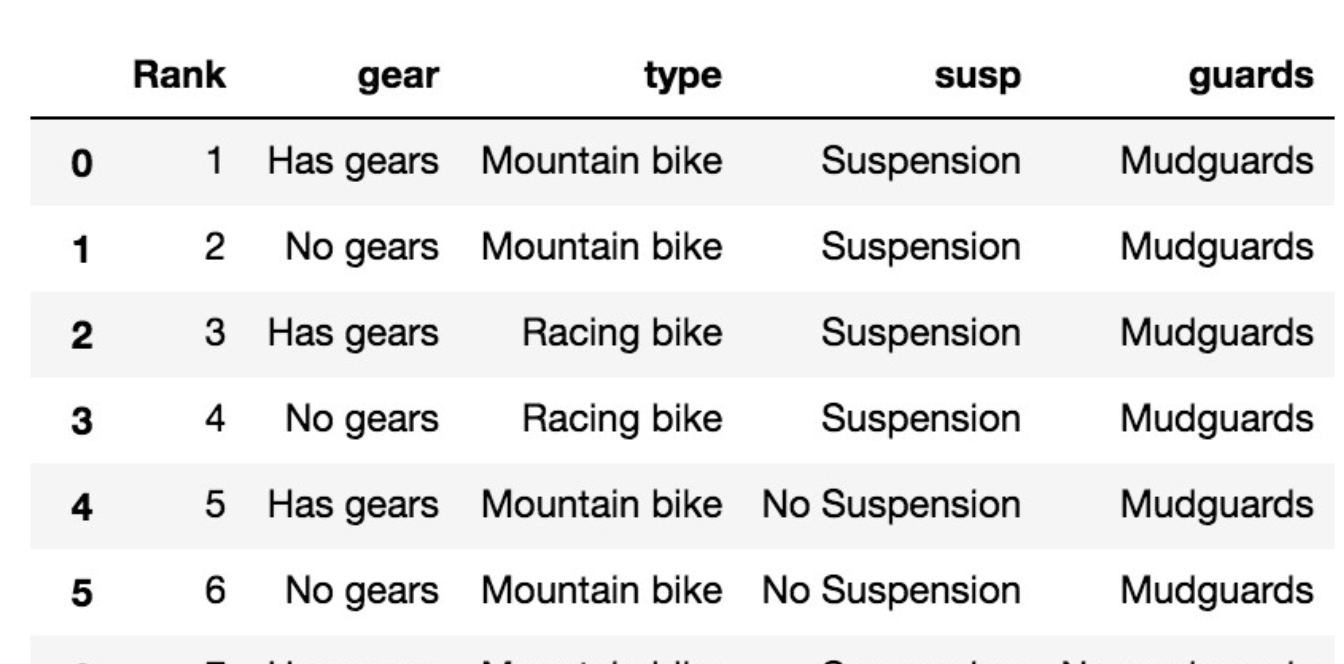

In [ ]:
#introduce dummy variables 
conjoint_data = pd.get_dummies(rank_data,columns =['gear','type','susp','guards'])
conjoint_data

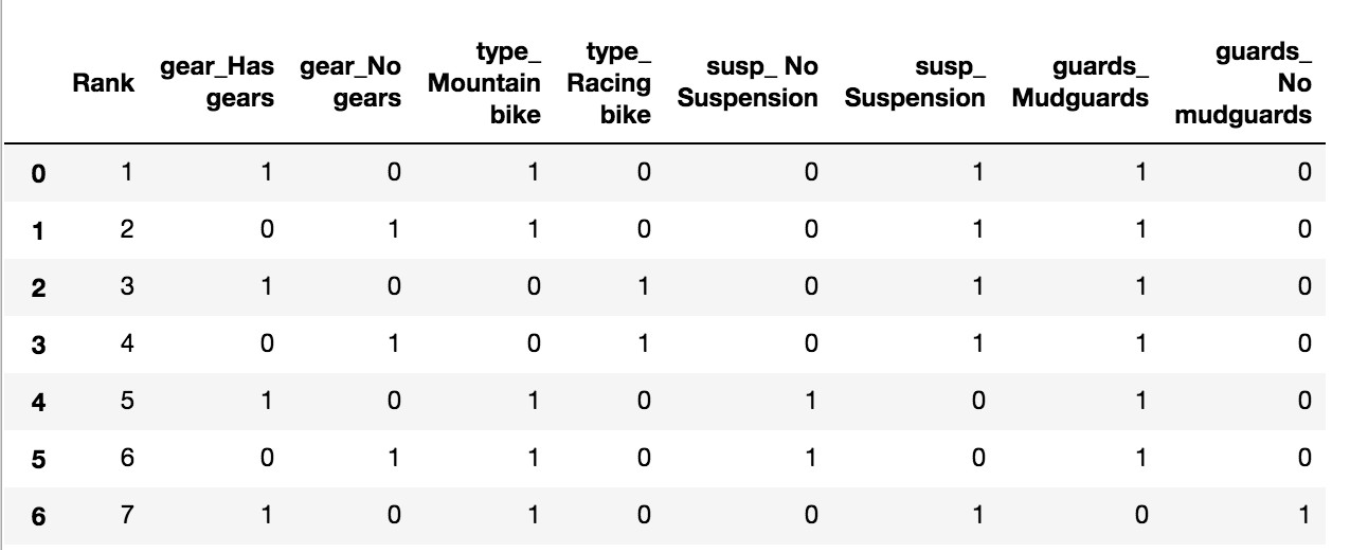

In [ ]:
#renaming columns of dataframe
fullNames = {"Rank":"Rank", \
           "gear_Has gears": "geared","gear_No gears": "fixedgear","type_ Mountain bike": "Mountain bike", \
          "type_ Racing bike": "Road Bike", "susp_ No Suspension":"Hardtail",  "susp_ Suspension":"Softtail", \
           "guards_ Mudguards":"Mudguarded", "guards_ No mudguards":"openmudguard"
          }

conjoint_data.rename(columns=fullNames, inplace=True)

In [ ]:
X = conjoint_data[[ u'geared', u'fixedgear', u'Mountain bike', u'Road Bike',
       u'Hardtail', u'Softtail', u'Mudguarded', u'openmudguard']]
X = sm.add_constant(X)
Y = conjoint_data.Rank
linearRegression = sm.OLS(Y, X).fit()
linearRegression.summary()

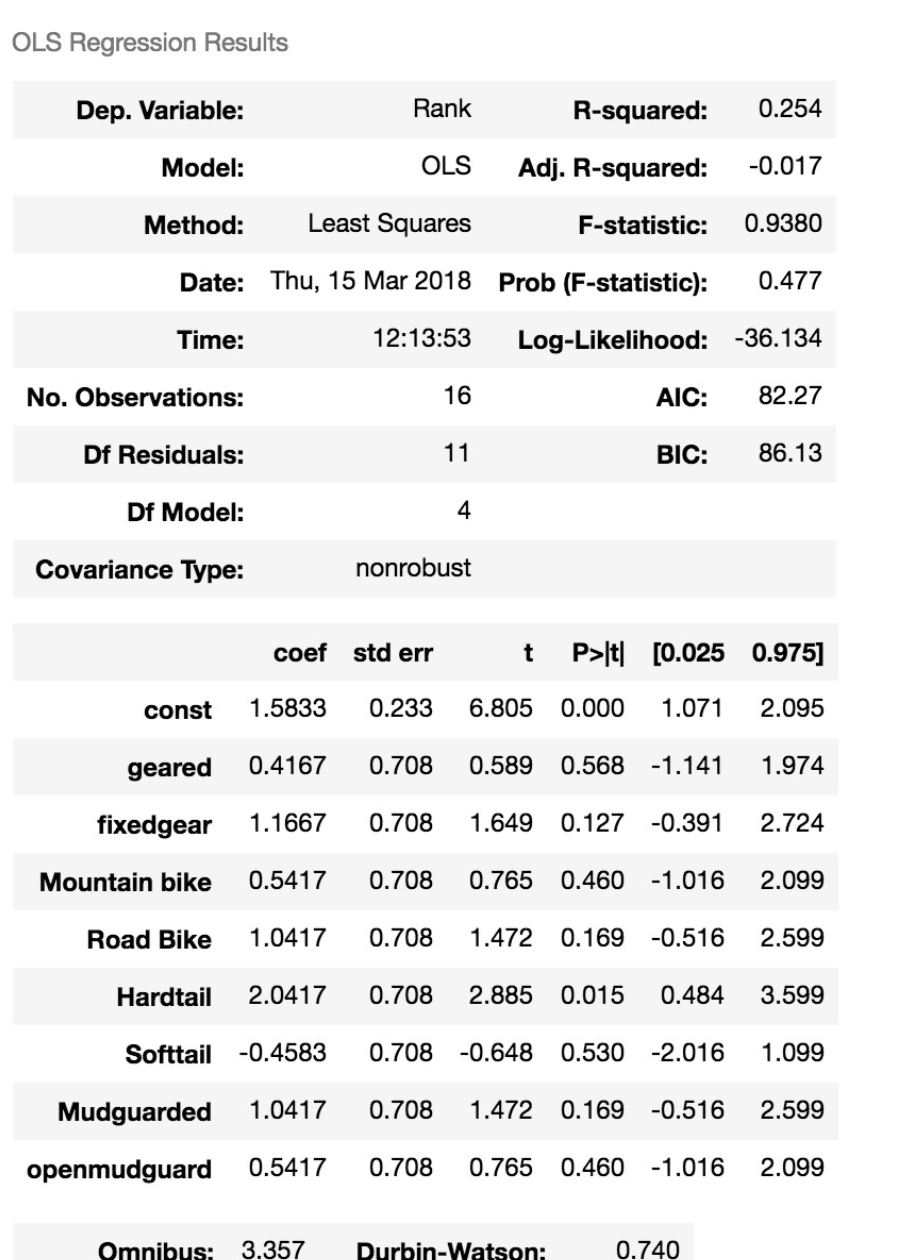

In [ ]:
# Estimate Part worth and Relative Importances:

conjoint_attributes = [u'geared', u'fixedgear', u'Mountain bike', u'Road Bike',
       u'Hardtail', u'Softtail', u'Mudguarded', u'openmudguard']
level_name = []
part_worth = []
part_worth_range = []
end = 1
for item in conjoint_attributes:
    nlevels = len(list(set(conjoint_data[item])))
    level_name.append(list(set(conjoint_data[item])))
    begin = end
    end = begin + nlevels - 1
    new_part_worth = list(linearRegression.params[begin:end])
    new_part_worth.append((-1) * sum(new_part_worth))
    part_worth_range.append(max(new_part_worth) - min(new_part_worth))
    part_worth.append(new_part_worth)
    # end set to begin next iteration

attribute_importance = []
for item in part_worth_range:
    attribute_importance.append(round(100 * (item / sum(part_worth_range)),2))


effect_name_dict = {u'geared':u'geared', u'fixedgear':u'fixedgear', u'Mountain bike':u'Mountain bike', u'Road Bike':u'Road Bike',
       u'Hardtail':u'Hardtail', u'Softtail':u'Softtail', u'Mudguarded':u'Mudguarded', u'openmudguard':u'openmudguard'}


#print out parthworth's for each level
estimates_of_choice = []
index = 0 
for item in conjoint_attributes : 
    print ("\n Attribute : " , effect_name_dict[item])
    print ("\n Importance : " , attribute_importance[index])
    print('    Level Part-Worths')
    for level in range(len(level_name[index])):
        print('       ',level_name[index][level], part_worth[index][level])
    index = index + 1


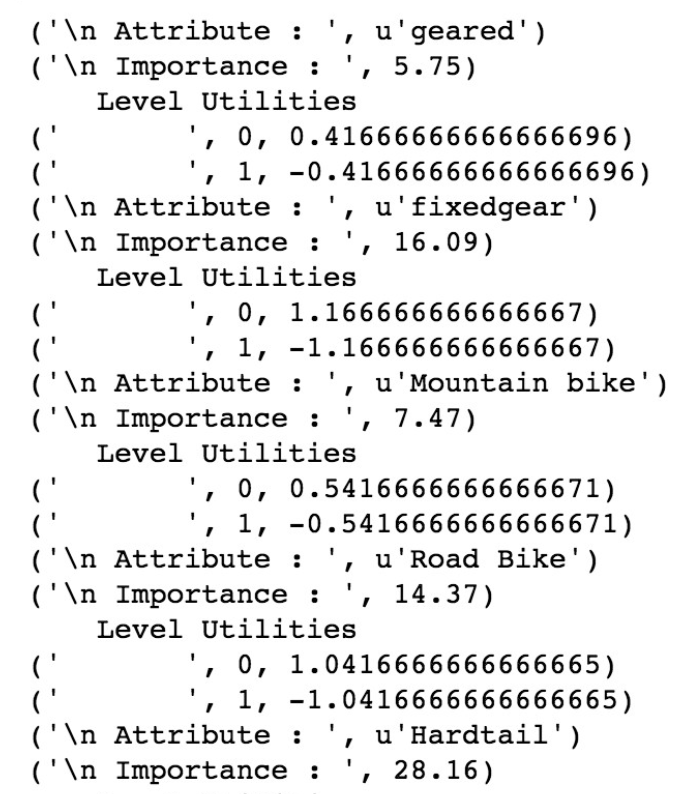

In [ ]:
#calculating Utilities
flattened_list = [val for sublist in utility for val in sublist]
y = pd.Series(flattened_list)
df2=conjoint_data[[ u'geared', u'fixedgear', u'Mountain bike', u'Road Bike',
       u'Hardtail', u'Softtail', u'Mudguarded', u'openmudguard']]
df2 = df2.astype(float)
i=0
for item in conjoint_attributes:
    df2[item]= df2[item]*flattened_list[i]
    i=i+1
df2

In [ ]:
#First Choice Rule/Maximum Utility Rule

utility_scores = df2.values.sum(axis=1)
max_utility = np.argmax(utility_scores)
print "The index of combination combination with hightest sum of utility scores is " 
print data.ix[max_utility]

# alternative

Say, you’re developing a new product. One thing you’ll want to know is how important various features of a product or service of that type are to consumers. We often try to get at this by asking respondents directly in focus groups or quantitative surveys, but this may mislead us because many people have difficulty answering questions such as these. In surveys, for example, many will claim that just about everything about a product is important.

## Reference

1.Wilcox, Ronald T., A Practical Guide to Conjoint Analysis. Darden Case No. UVA-M-0675, Available at SSRN: https://ssrn.com/abstract=910102

2. https://www.linkedin.com/pulse/conjoint-analysis-simple-python-implementation-prajwal-sreenivas

3. https://github.com/Herka/Traditional-Conjoint-Analysis-with-Python/blob/master/Traditional%20Conjoint%20Analyse.ipynb

4. 